In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error, roc_curve, auc, roc_auc_score, recall_score, accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from imblearn.over_sampling import SMOTE

import itertools
import os 
os.chdir('e:/ml_data/kaggle_data/')

In [3]:
train = pd.read_csv('./heart_disease_uci.csv')
# test = pd.read_csv('./test.csv')

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.000,75964.051,43781.947,1.000,38104.750,76043.000,113748.750,151838.000
var3,76020.000,-1523.199,39033.462,-999999.000,2.000,2.000,2.000,238.000
var15,76020.000,33.213,12.956,5.000,23.000,28.000,40.000,105.000
imp_ent_var16_ult1,76020.000,86.208,1614.757,0.000,0.000,0.000,0.000,210000.000
imp_op_var39_comer_ult1,76020.000,72.363,339.316,0.000,0.000,0.000,0.000,12888.030
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.000,1.859,147.787,0.000,0.000,0.000,0.000,24650.010
saldo_medio_var44_ult1,76020.000,76.026,4040.338,0.000,0.000,0.000,0.000,681462.900
saldo_medio_var44_ult3,76020.000,56.614,2852.579,0.000,0.000,0.000,0.000,397884.300
var38,76020.000,117235.809,182664.599,5163.750,67870.613,106409.160,118756.253,22034738.760


In [4]:
i = 0
for col in train.columns:
    if train[col].var() == 0:
        i += 1
        train.drop(col, axis=1, inplace=True)
        test.drop(col, axis=1, inplace=True)
print(f"{i} features has been deleted")

34 features has been deleted


In [5]:
train.shape, test.shape

((76020, 337), (75818, 336))

In [6]:
i = 0
for col in train.columns:
    if np.percentile(train[col], 99) == 0:
        i += 1
        train.drop(col, axis=1, inplace=True)
        test.drop(col, axis=1, inplace=True)
print(f"{i} featrues has been deleted")
train.shape, test.shape

188 featrues has been deleted


((76020, 149), (75818, 148))

In [7]:
train = train.T.drop_duplicates(keep='last').T
test = test.T.drop_duplicates(keep='last').T

In [8]:
train.shape, test.shape

((76020, 143), (75818, 142))

In [9]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [10]:
def countplot_target(df, h=500):

    plt.figure(figsize=(5,5))
    plt.rcParams["axes.unicode_minus"] = False
    ax = sns.countplot(x='TARGET', data=df)
    plt.title("TARGET variable frequency")
    plt.show()

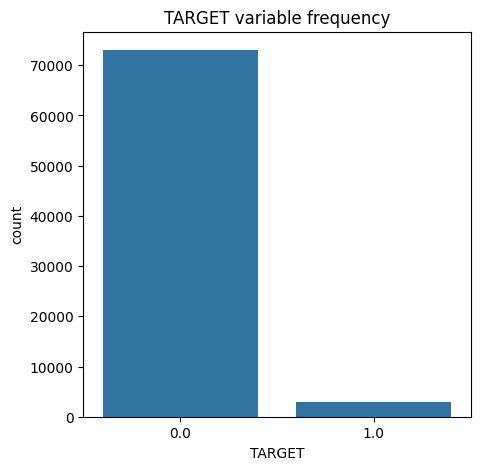

In [11]:
countplot_target(train)

In [12]:
def histplot_comb(col, train=train, test=test, size=(20, 5), bins=20):
    plt.subplots(1, 2, figsize=size)
    plt.subplot(121)
    plt.title(f"train set {col} distribution")
    plt.ylabel("frequency")
    plt.xlabel(col)
    plt.hist(train[col], bins=bins)
    plt.subplot(122)
    plt.title(f"test set {col} distribution")
    plt.ylabel('frequency')
    plt.xlabel(col)
    plt.hist(test[col], bins=bins)
    plt.show()

In [13]:
def valuecounts_plot(col, train=train, test=test):

    plt.subplots(1, 2, figsize=(15, 6))
    plt.subplot(121)
    df = train[col].value_counts().sort_index()
    sns.lineplot(x=df.index, y=df.values)
    plt.title(f'{col} frequency distribution')
    plt.ylabel('frequency')

    plt.subplot(122)
    df = test[col].value_counts().sort_index()
    sns.lineplot(x=df.index, y=df.values)
    plt.title(f'{col} frequency distribution')
    plt.ylabel('frequency')

    plt.tight_layout()
    plt.show()

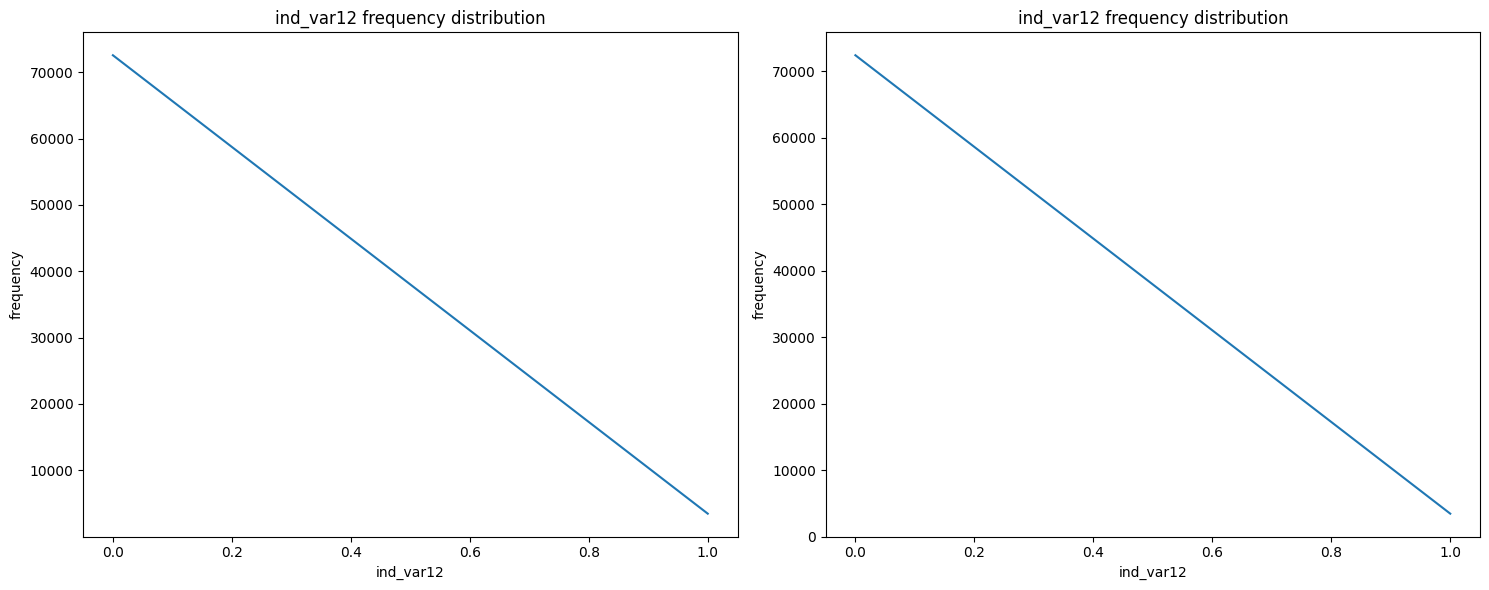

In [14]:
valuecounts_plot(train.columns[20])

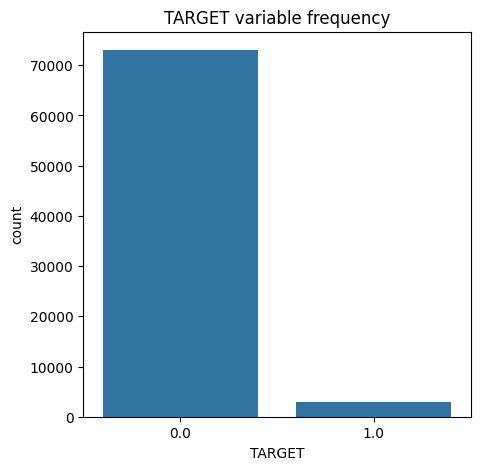

In [15]:
countplot_target(train)

In [16]:
train['var3'].replace(-999999, 2, inplace=True)
test['var3'].replace(-999999, 2, inplace=True)

C:\Users\fxinw\AppData\Local\Temp\ipykernel_44308\140946445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['var3'].replace(-999999, 2, inplace=True)
C:\Users\fxinw\AppData\Local\Temp\ipykernel_44308\140946445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

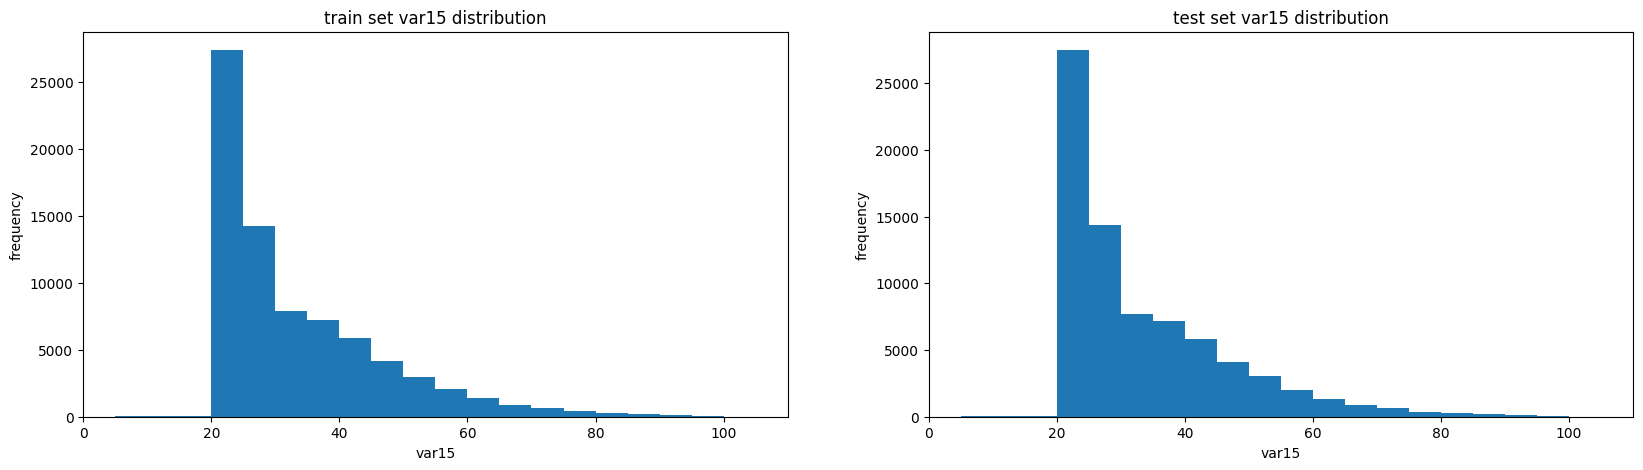

In [17]:
histplot_comb('var15')

In [19]:
for df in [train, test]:
    df['var15_below_23'] = np.zeros(df.shape[0], dtype=int)
    df.loc[df['var15'] < 23, 'var15_below_23'] = 1

In [20]:
df['var15_below_23'].value_counts()

var15_below_23
0    74641
1     1177
Name: count, dtype: int64

In [21]:
train[(train['TARGET'] == 1)]['var15'].describe()

count   3008.000
mean      39.681
std       12.021
min       23.000
25%       30.000
50%       38.000
75%       47.000
max      102.000
Name: var15, dtype: float64

In [22]:
_, bins = pd.cut(train['var15'].values, 5, retbins=True)
print(_)

[(4.9, 25.0], (25.0, 45.0], (4.9, 25.0], (25.0, 45.0], (25.0, 45.0], ..., (45.0, 65.0], (25.0, 45.0], (4.9, 25.0], (4.9, 25.0], (45.0, 65.0]]
Length: 76020
Categories (5, interval[float64, right]): [(4.9, 25.0] < (25.0, 45.0] < (45.0, 65.0] < (65.0, 85.0] < (85.0, 105.0]]


In [23]:
train['var15'] = pd.cut(train['var15'].values, bins, labels=False)
test['var15'] = pd.cut(test['var15'].values, bins, labels=False)

In [24]:
train['var15'].value_counts()

var15
1    32019
0    31831
2     9816
3     2046
4      308
Name: count, dtype: int64

In [25]:
mask = train[train['var38'] <= np.quantile(train.var38.values, 0.975)]


In [26]:
mask['var38'] = np.log(mask.var38).values

C:\Users\fxinw\AppData\Local\Temp\ipykernel_44308\2980477070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['var38'] = np.log(mask.var38).values


In [31]:
for df in [train, test]:
    df['var38'] = np.log(df['var38'].values)

In [33]:
col = 'imp_trans_var37_ult1'

In [35]:
train[col].describe()

count     76020.000
mean       1932.954
std       25355.717
min           0.000
25%           0.000
50%           0.000
75%           0.000
max     2310003.000
Name: imp_trans_var37_ult1, dtype: float64

In [38]:
train[col].value_counts() / len(train[col]) * 100

imp_trans_var37_ult1
0.000      87.069
300.000     0.537
600.000     0.421
1500.000    0.362
150.000     0.345
            ...  
2.370       0.001
4171.680    0.001
7881.960    0.001
4740.000    0.001
792.810     0.001
Name: count, Length: 3831, dtype: float64

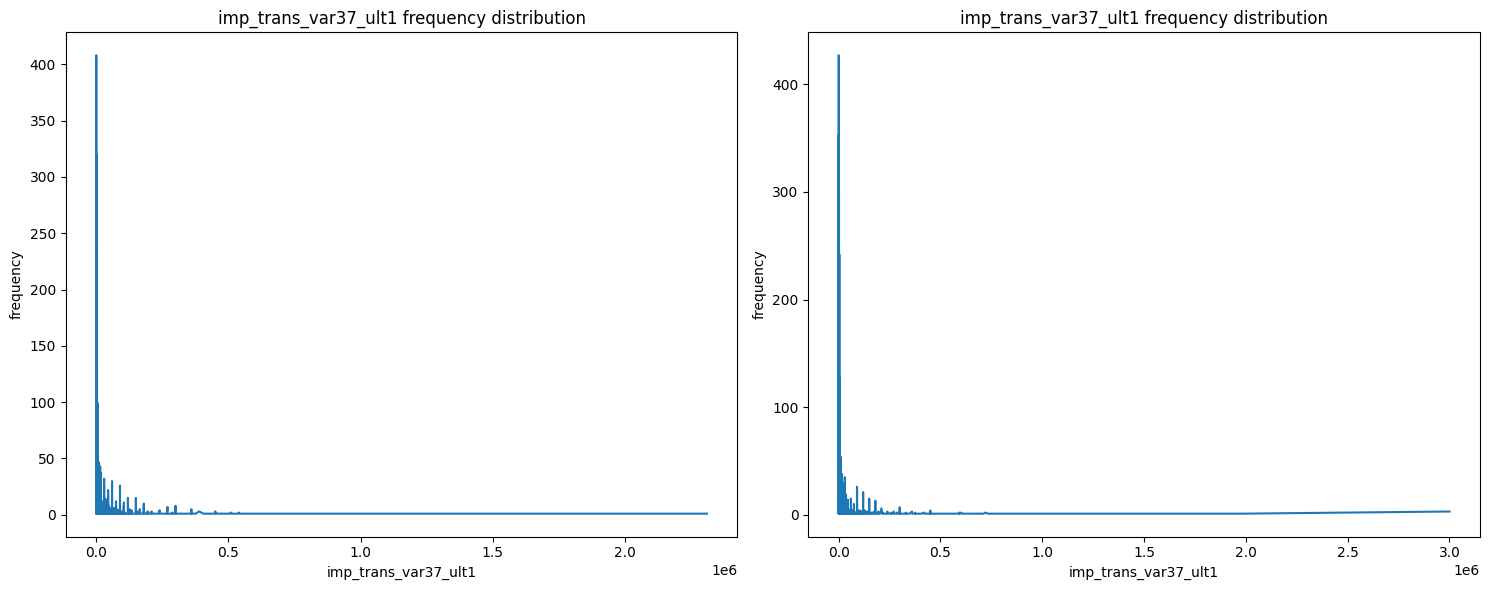

In [39]:
valuecounts_plot(train=train[train[col] != 0], test=test[test[col] != 0], col=col)

In [40]:
df = train[train[col] != 0]
df1 = test[test[col] != 0]
for data in [df, df1]:
    data.loc[data[col] != 0, col] = np.log(data.loc[data[col]!=0, col])
    

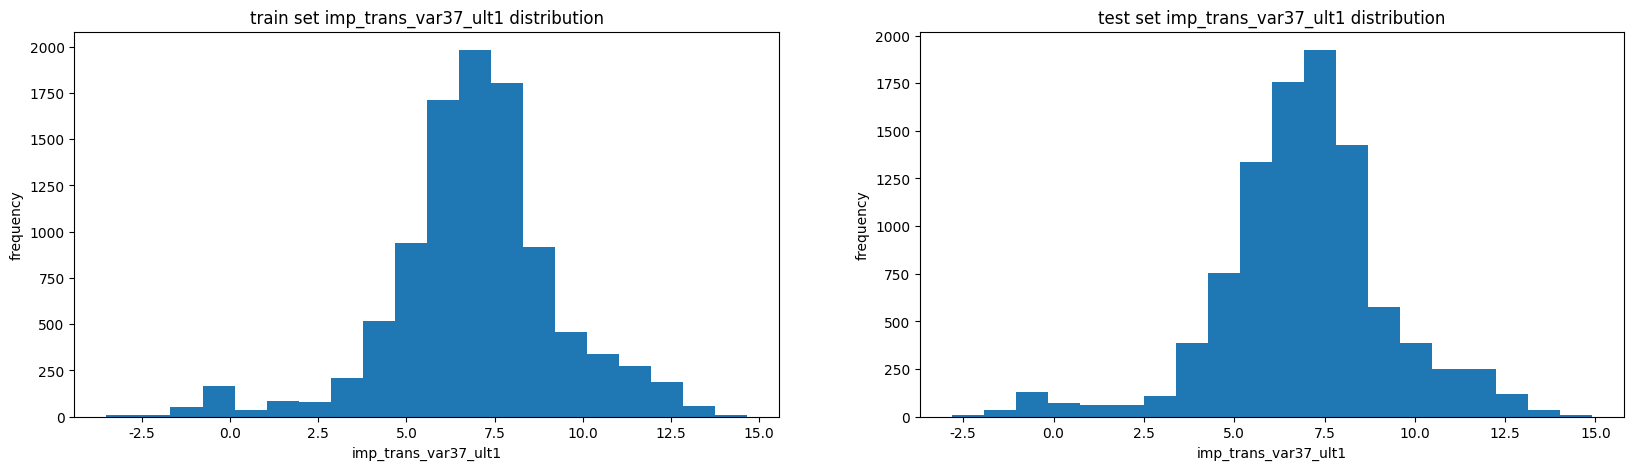

In [41]:
histplot_comb(col, train=df, test=df1)